<a href="https://colab.research.google.com/github/ANGELA-NYUTU/KNN-NAIVE-BAYES/blob/main/Moringa_Data_Science_Core_WEEK_9_Independent_Project_2021_10_Angela_Nyutu_Python_Notebook_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Spam Messages**

## **Objective:**
To create a model that predicts and classifies a messange as spam or non-spam

## **Context**
The dataset provided gives the frequency of specific words that may appear in a message and the likelyhood thhat it may contain spam or not

## **Metric for Success**
Using Naive Bayes techniques, create a model that accuratly predicts spam messages and non- spam messages


## **Experimental Design**

Several experimental designs will be used i.e.:

a.Exploratory data analysis

b.Naive Bayes (Gaussian)


## **Dataset Loading and Preview**

### **Importing Libraries**

In [240]:
#Reading libraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Naive bayes libraries
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### **Loading the Dataset**

In [241]:
with open('/content/spambase.names') as f:
  description=f.read()
  print(description)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [335]:
spamdf=pd.read_csv('/content/spambase.data')
spamdf.columns = ['make','address','all','3d','our','over','remove','internet','order','mail','receive','will','people','report','addresses','free','business','email','you','credit','your','font','000','money','hp','hpl','george','650','lab','labs','telnet','857','data','415','85','technology','1999','parts','pm','direct','cs','meeting','original','project','word_freq_re','education','table','conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']

**Dataset Preview**

Top of the dataframe

In [336]:
spamdf.head()

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,word_freq_re,education,table,conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [331]:
spamdf['spam'].unique()

array([1, 0])

Bottom of the Dataframe

In [337]:
spamdf.tail()

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,word_freq_re,education,table,conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


Size

In [338]:
print('The spam dataset has',spamdf.columns.shape,'columns and',spamdf.index.shape,'rows')

The spam dataset has (58,) columns and (4600,) rows


Data Types

In [339]:
spamdf.dtypes

make                          float64
address                       float64
all                           float64
3d                            float64
our                           float64
over                          float64
remove                        float64
internet                      float64
order                         float64
mail                          float64
receive                       float64
will                          float64
people                        float64
report                        float64
addresses                     float64
free                          float64
business                      float64
email                         float64
you                           float64
credit                        float64
your                          float64
font                          float64
000                           float64
money                         float64
hp                            float64
hpl                           float64
george      

Columns

In [340]:
spamdf.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 'word_freq_re', 'education',
       'table', 'conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
       'char_freq_!', 'char_freq_$', 'char_freq_#',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total', 'spam'],
      dtype='object')

## **Dataset Cleaning**

**Missing Values**

In [341]:
def missing_vals(df):
  df1=df.isnull().sum()
  return df1

In [342]:
missing_vals(spamdf)
#there are no missing values

make                          0
address                       0
all                           0
3d                            0
our                           0
over                          0
remove                        0
internet                      0
order                         0
mail                          0
receive                       0
will                          0
people                        0
report                        0
addresses                     0
free                          0
business                      0
email                         0
you                           0
credit                        0
your                          0
font                          0
000                           0
money                         0
hp                            0
hpl                           0
george                        0
650                           0
lab                           0
labs                          0
telnet                        0
857     

**Duplicated Values**

In [343]:
def duplicates(df):
  dup=df.duplicated().sum()
  if dup != 0:
    df.drop_duplicates(inplace=True)
    dup1=df.duplicated().sum()
    return dup1

In [344]:
duplicates(spamdf)

0

**Modifying columns names**

In [345]:
def tidy_columns(df):
  tidy=df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
  return tidy

In [346]:
tidy_columns(spamdf)

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 'word_freq_re', 'education',
       'table', 'conference', 'char_freq_;', 'char_freq_', 'char_freq_[',
       'char_freq_!', 'char_freq_$', 'char_freq_#',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total', 'spam'],
      dtype='object')

In [347]:
def outliers(df):
  out=df[['capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total',]].boxplot(figsize=(10,10))
  return out

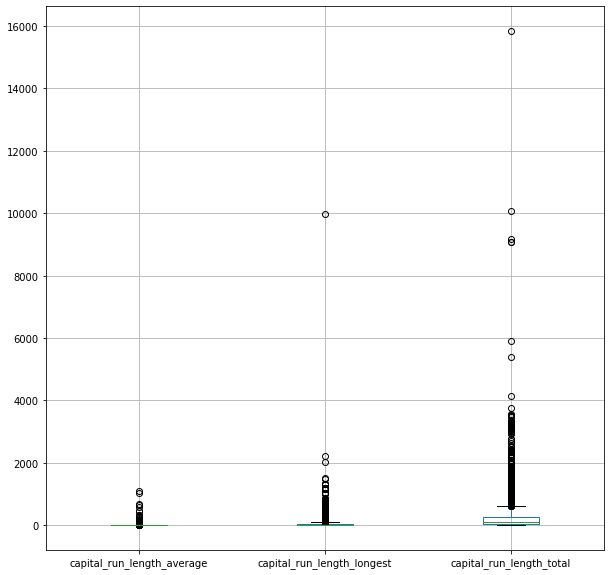

In [348]:
outliers(spamdf)

##**Exploratory Data Analysis**

### **Univariate Analysis**

In [258]:
def pie(df,column):
  out=df[column].value_counts()
  plt.figure(figsize=(7,6))
  pie=plt.pie(out, labels=(df[column].unique()), autopct='%.1f%%',startangle = 90)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.legend(title = f'{column}')
  plt.show()
  return pie,plt.show()

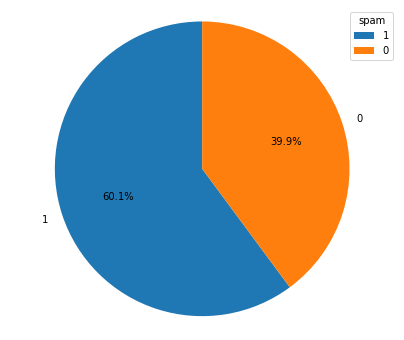

(([<matplotlib.patches.Wedge at 0x7fd00982c8d0>,
  [Text(-1.0447322548794369, -0.34428841922801784, '1'),
   Text(1.0447322871140405, 0.34428832141312327, '0')],
  [Text(-0.5698539572069655, -0.18779368321528242, '60.1%'),
   Text(0.5698539747894766, 0.1877936298617036, '39.9%')]),
 None)

In [259]:
pie(spamdf,'spam')
#The dataset has 60.1% spam messages and 39.9% non-spam messages

In [265]:
def distribution(df,column):
  out=qqplot(df[column],line='s')
  plt.show()
  return out, plt.show

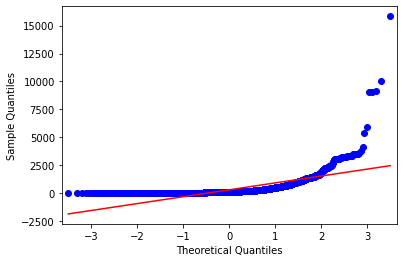

(<Figure size 432x288 with 1 Axes>, <function matplotlib.pyplot.show>)

In [266]:
distribution(spamdf,'capital_run_length_total')

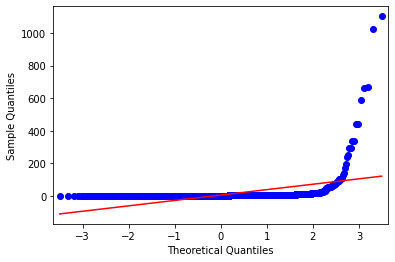

(<Figure size 432x288 with 1 Axes>, <function matplotlib.pyplot.show>)

In [269]:
distribution(spamdf,'capital_run_length_average')
       

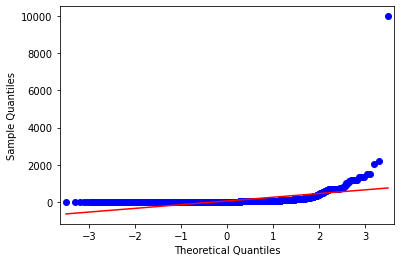

(<Figure size 432x288 with 1 Axes>, <function matplotlib.pyplot.show>)

In [270]:
distribution(spamdf,'capital_run_length_longest')

Most of the variables are normally distributed which is important in implementing naive bayes techniques

### **Bivariate Analysis**

In [325]:
def visual(df,column1,column2):
  data=df.groupby([column1,column2])[column2].sum()
  out=data.unstack().plot(kind='bar',stacked= True,figsize=(10,8))
  plt.yaxis=("No of People who ",f'{column2}')
  title=("No of People who ",f'{column2}',"per",f'{column1}')
  plt.show()
  return out, plt.show()

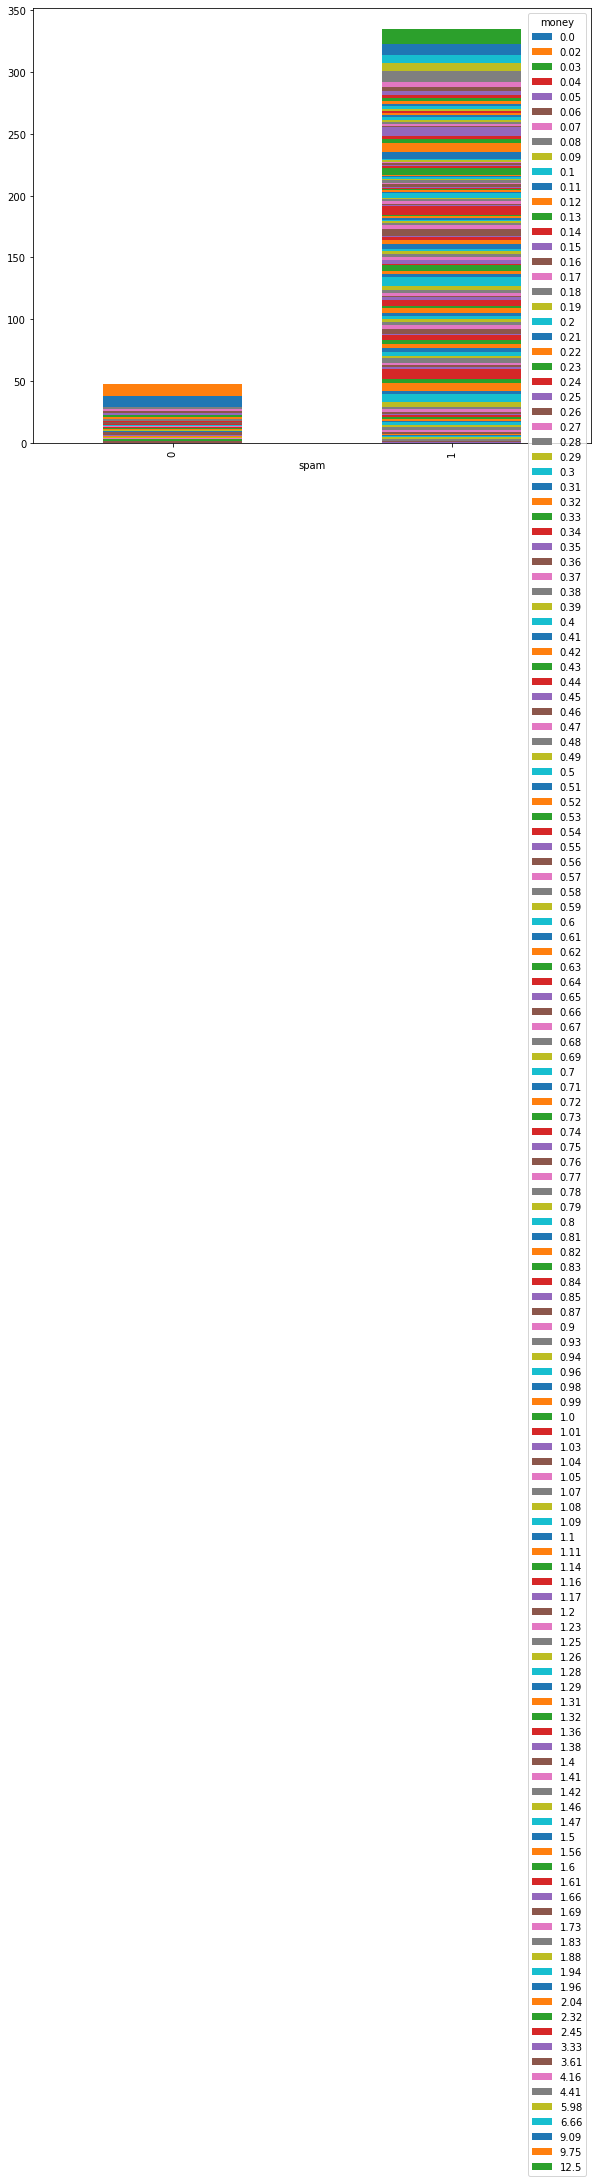

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcfec4b3dd0>, None)

In [350]:
visual(spamdf,'spam','money')

Most spam messages have the word 'money' in them

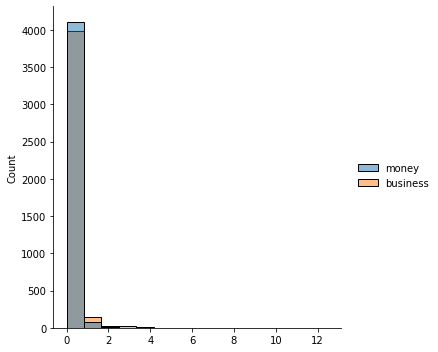

In [359]:
sns.displot(spamdf[['money','business']])

The likehood that a message containingthe word business has also a high chance of containingthe word 'money'

### **Multivariate Analysis**

In [308]:
spamdf.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.05

## **Naive Bayes Modeling and Predictions**

### **Data Preparation**

**Defining the variables**

In [272]:
x1=spamdf.iloc[:,:-1]
x=spamdf.iloc[:,:-1].values
y=spamdf.iloc[:,-1].values

**Checking for multicollinearity**

In [273]:
#Checking for multicollinearity using Variance Inflation Factor
corr=x1.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
#The results show VIF scores below 5 which means not independent factor heavily rely on each other

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.101318,-0.004239,-0.015562,-0.000934,0.009140,-0.012811,0.035998,0.049797,-0.061124,-0.005105,-0.002372,-0.069769,-0.019429,-0.008085,0.054248,-0.031623,-0.052862,-0.024629,-0.047615,0.017761,-0.035860,0.021367,-0.106543,-0.181790,0.017760,0.005912,0.017026,0.000461,0.025063,0.018169,-0.004153,0.464727,0.018465,-0.540531,0.006122,0.026960,0.028488,0.000679,-0.016168,0.040053,-0.024390,-0.002417,-0.013151,0.006639,0.012678,0.015557,0.000047,0.005574,0.009480,-0.008375,0.021603,-0.017726,-0.015714,0.007477,-0.031306,0.009200,-0.038382
word_freq_address,-0.004239,1.107739,0.003552,0.015602,-0.011684,0.015211,-0.039557,0.014512,-0.006418,-0.189410,0.001729,-0.026898,0.011197,-0.011150,0.007056,-0.013751,0.017331,-0.194697,0.021072,0.028121,-0.067843,0.012840,0.043022,-0.026486,0.025978,0.017127,-0.001713,0.027806,0.024307,0.048632,0.029988,-0.521734,0.012248,0.283682,0.005792,0.049941,-0.025299,0.011152,0.016365,0.074187,0.005907,0.007604,-0.042284,0.015785,-0.041138,0.012905,0.015826,0.013091,-0.028032,0.044663,0.017188,-0.005444,-0.017735,-0.028133,0.001233,-0.037837,-0.005492
word_freq_all,-0.015562,0.003552,1.094231,0.023946,-0.019610,-0.020679,0.024928,0.028312,-0.023688,0.023085,0.001603,-0.045843,-0.004508,0.009531,-0.059081,-0.030527,0.027085,-0.063373,-0.071550,-0.003120,-0.088690,0.039744,-0.050935,0.027926,0.050273,0.003056,0.052373,0.007968,0.050852,-0.056235,-0.028845,-0.080148,0.039020,0.113510,0.017953,-0.019272,0.023034,-0.033010,-0.015304,0.023660,-0.000155,-0.029437,0.017630,0.046794,0.041729,0.044965,-0.029663,0.017754,0.009806,-0.009504,0.012875,-0.065790,0.002370,0.006370,-0.091010,-0.009261,-0.007157
word_freq_3d,-0.000934,0.015602,0.023946,1.006486,0.000999,0.015999,-0.012396,-0.003806,0.008484,0.001788,0.019929,0.017821,0.020074,-0.001238,0.004596,0.000791,0.005126,-0.019528,0.017491,0.009127,-0.002072,-0.030799,-0.013729,-0.026021,0.012783,0.006837,0.010549,0.003169,-0.001695,0.003482,0.002935,-0.030103,0.010095,0.011571,-0.000024,0.000205,-0.000148,0.001616,-0.003635,0.007600,0.001244,0.006981,0.004306,0.007535,0.011028,0.011280,0.003588,0.002553,0.015129,0.027086,0.007355,0.005273,-0.002551,0.008446,0.011912,-0.036237,-0.010700
word_freq_our,0.009140,-0.011684,-0.019610,0.000999,1.111601,-0.014704,-0.088853,0.023082,0.039627,0.002764,-0.015693,-0.024127,-0.002326,0.000212,-0.031276,-0.043993,-0.107244,-0.014994,-0.033370,0.015132,-0.086262,0.018952,-0.020020,0.040569,0.019013,0.039224,0.045952,0.015230,-0.029474,0.013439,0.018748,-0.128505,0.017747,0.054021,0.016366,0.016861,0.018957,-0.134254,0.016761,0.011322,0.010970,-0.104789,0.021749,-0.018429,0.028573,0.063019,0.029509,0.024769,0.010945,0.033289,0.003188,0.019756,0.001235,0.001455,-0.039848,-0.032380,0.036211
word_freq_over,-0.012811,0.015211,-0.020679,0.015999,-0.014704,1.077883,-0.009177,-0.048185,-0.043102,0.039852,0.004232,0.010390,-0.027550,0.009535,-0.075615,0.023642,0.003450,-0.011146,-0.023626,-0.030008,-0.029525,-0.005957,-0.120660,-0.020201,0.027474,0.036334,0.020147,0.023721,0.004628,-0.016035,0.009663,-0.103090,0.015587,0.04877

**Splitting data**

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.4, random_state=42)

**Pre-processing data**

In [275]:
#Scaling our data
def scale(var1,var2):
  sc = StandardScaler()
  var1 = sc.fit_transform(var1)
  var2 = sc.transform(var2)
  return var1,var2

In [276]:
#Scalling on various amount of training and testing data
scale(x_train,x_test)
scale(x1_train,x1_test)
scale(x2_train,x2_test)

(array([[-0.35447822, -0.24475266, -0.56646394, ..., -0.05520469,
         -0.16036528, -0.36030046],
        [-0.35447822, -0.24475266,  1.6180965 , ..., -0.086772  ,
         -0.14766821, -0.24790923],
        [-0.35447822, -0.24475266, -0.56646394, ..., -0.10479591,
         -0.18999178, -0.29473891],
        ...,
        [-0.35447822, -0.24475266, -0.56646394, ..., -0.10130823,
         -0.17729471, -0.36654442],
        [-0.35447822, -0.24475266,  0.50631128, ..., -0.08218965,
         -0.0291622 , -0.3259587 ],
        [-0.35447822, -0.24475266,  0.05769619, ..., -0.1088182 ,
         -0.18575942, -0.25571417]]),
 array([[-3.54478218e-01, -2.44752656e-01, -5.66463936e-01, ...,
         -2.66413738e-02,  1.31613744e-02, -3.40007602e-01],
        [ 1.03762721e+00, -2.44752656e-01, -5.66463936e-01, ...,
         -1.38752975e-03,  2.24779245e-01, -1.60493821e-01],
        [-3.54478218e-01, -2.44752656e-01, -5.66463936e-01, ...,
         -9.89916004e-02, -1.73062351e-01, -3.99325199e-

**Perform LDA for feature reduction**

In [277]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=6)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [278]:
lda = LDA(n_components=6)
x1_train = lda.fit_transform(x1_train, y1_train)
x1_test = lda.transform(x1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [279]:
lda = LDA(n_components=6)
x2_train = lda.fit_transform(x2_train, y2_train)
x2_test = lda.transform(x2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


### **Fitting the model**

**model 1: 80-20 split**

In [287]:
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)
ypred=model.predict(x_test)
print('Accuracy:',round(metrics.accuracy_score(y_test,ypred)*100),'%')
print('matrix:',metrics.confusion_matrix(y_test,ypred))

Accuracy: 89 %
matrix: [[463  20]
 [ 69 290]]


**model 2: 70-30 split**

In [288]:
gnb=GaussianNB()
model1=gnb.fit(x1_train,y1_train)
ypred1=model1.predict(x1_test)
print('Accuracy:',round(metrics.accuracy_score(y1_test,ypred1)*100),'%')
print('matrix:',metrics.confusion_matrix(y1_test,ypred1))

Accuracy: 90 %
matrix: [[712  28]
 [101 422]]


**model 3: 60-40 split**

In [289]:
gnb=GaussianNB()
model2=gnb.fit(x2_train,y2_train)
ypred2=model2.predict(x2_test)
print('Accuracy:',round(metrics.accuracy_score(y2_test,ypred2)*100),'%')
print('matrix:',metrics.confusion_matrix(y2_test,ypred2))

Accuracy: 90 %
matrix: [[948  40]
 [123 573]]


**Summary** The model using the 60-40 split has the most true positive. However all have a 90% accuracy thus splitting sizes does not really affect the model